In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Relavant Datasets

In [3]:
# Client Profiles (df_final_demo): Demographics like age, gender, and account details of our clients.
df_client = pd.read_csv('C:/Users/luson/IH_QUESTS/Project2/Datasets/Datasets_raw/df_final_demo.txt')

# Experiment Client (df_final_experiment_clients): A list revealing which clients were part of the grand experiment.
df_ec = pd.read_csv('C:/Users/luson/IH_QUESTS/Project2/Datasets/Datasets_raw/df_final_experiment_clients.txt')

# Digital Footprints (df_final_web_data): A detailed trace of client interactions online, divided into two parts:
df_fwd1 = pd.read_csv('C:/Users/luson/IH_QUESTS/Project2/Datasets/Datasets_raw/df_final_web_data_pt_1.txt')
df_fwd2 = pd.read_csv('C:/Users/luson/IH_QUESTS/Project2/Datasets/Datasets_raw/df_final_web_data_pt_2.txt')

Data Combining

In [4]:
# Merging the two parts of the digital footprints into a single DataFrame.
df_web = pd.concat([df_fwd1, df_fwd2], ignore_index=True)
# df_web

Standardize Column Names

In [5]:
# Only found in df_ec where 'Variation' is not all lowercase. 
# The other dataframe columns are already lowercase, and easy to understand.
df_ec.columns = df_ec.columns.str.lower()

Checking Null Vaules in dataframes

In [6]:
# df_client has very few missing values, and the columns with missing values are not so important for our analysis. So we can keep the nulls.
df_client.isnull().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [ ]:
# in df_ec there are 20,109 missing values in the column 'variation'.
# This column shows whether the client was part of the experiment or not, and which group (control or test) they were in.
# Fill the missing values with 'Unknown' to avoid dropping rows unnecessarily.
df_ec.isnull().sum()
df_ec['variation'] = df_ec['variation'].fillna('Unknown')

In [8]:
# in df_web there are no null values.
df_web.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

Demographics of the clients (based on total population (df_web) during the testing timeframe: 15/03/2017-20/06/2017)

In [ ]:
# In order to answer this question, we need to merge the df_web and df_client dataframes.
df_web_client = df_web.merge(df_client, how='inner', on='client_id')
# df_web_client

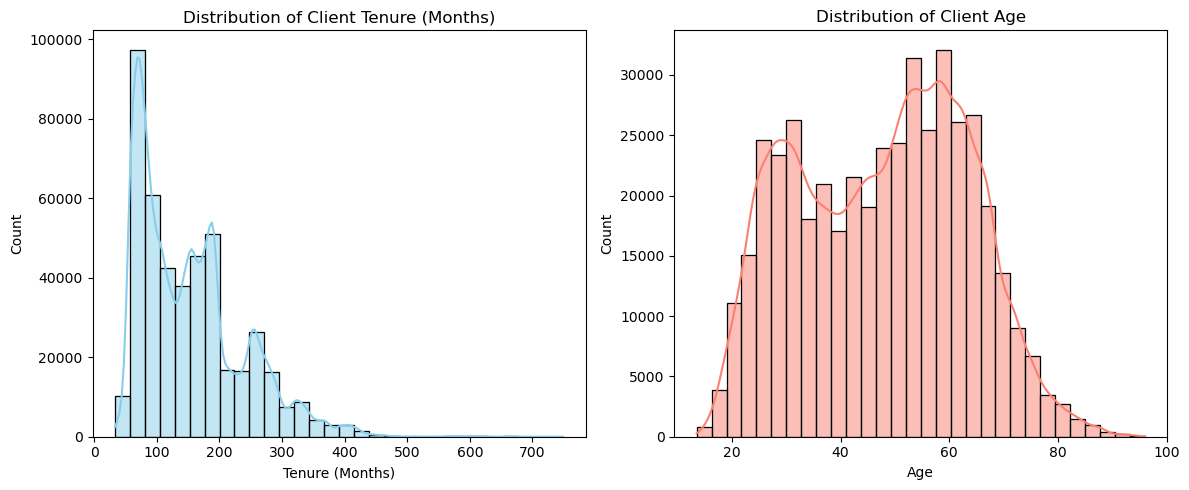

In [ ]:
# Are the primary clients younger or older, new or long-standing?

# Histogram of clnt_tenure_mnth
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_web_client['clnt_tenure_mnth'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Client Tenure (Months)')
plt.xlabel('Tenure (Months)')

# Histogram of clnt_age
plt.subplot(1, 2, 2)
sns.histplot(df_web_client['clnt_age'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Client Age')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

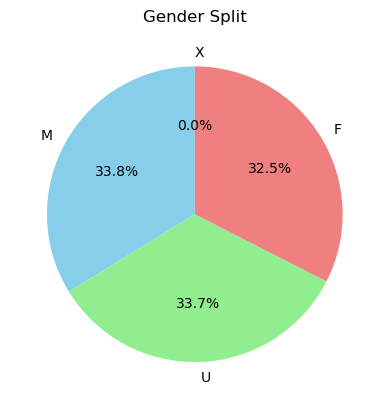

In [ ]:
# Gender Distribution of the Clients.

geneder_split = df_web_client['gendr'].value_counts()
geneder_split.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen','lightcoral'])
plt.title('Gender Split')
plt.ylabel('')  # Hide y-label
plt.show()

KPI Analysis

In [41]:
# Completion Rate: The proportion of users who reach the final ‘confirm’ step.

# Step 1: Total number of unique customers
total_clients = df_web['client_id'].nunique()

# Step 2: Number of customers who reached the "completed" step
completed_clients = df_web[df_web['process_step'] == 'confirm']['client_id'].nunique()

# Step 3: Calculate the proportion
proportion_completed = completed_clients / total_clients

print(f"Proportion of clients who completed the process: {proportion_completed:.2%}")

Proportion of clients who completed the process: 67.53%


process_step
confirm   0 days 00:04:07.421603280
start     0 days 00:00:58.619549051
step_1    0 days 00:01:00.377921904
step_2    0 days 00:01:32.403757050
step_3    0 days 00:02:12.068871797
Name: time_spent, dtype: timedelta64[ns]


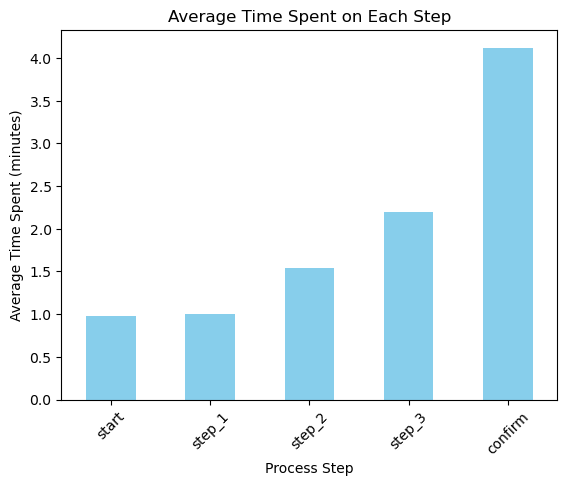

In [ ]:
# Time Spent on Each Step: The average duration users spend on each step.
# create a new coumn called 'time_spent' that calculates the time spent on each step.

# step 1. Convert date_time to datetime format
df_web['date_time'] = pd.to_datetime(df_web['date_time'])

# step 2. Sort the DataFrame by client_id and date_time to ensure the time difference is calculated correctly.
df_web = df_web.sort_values(by=['client_id', 'visit_id', 'date_time'])

# step 3. Calculate time spent between steps per client/session
# Shift to get the next step's time within each session
df_web['next_step_time'] = df_web.groupby(['client_id', 'visit_id'])['date_time'].shift(-1)
# Time spent on each step
df_web['time_spent'] = df_web['next_step_time'] - df_web['date_time']

# step 4. Calculate average time per step
avg_time_per_step = df_web.groupby('process_step')['time_spent'].mean()

print(avg_time_per_step)

# Visualization
# Convert timedelta to minutes (as float)
avg_time_per_step_minutes = avg_time_per_step.dt.total_seconds() / 60
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
avg_time_per_step_minutes = avg_time_per_step_minutes.reindex(step_order)
plot = avg_time_per_step_minutes.plot(kind='bar', color='skyblue')
plt.title('Average Time Spent on Each Step')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (minutes)')
plt.xticks(rotation=45)
plt.show()

In [61]:
df_web

,client_id,visitor_id,visit_id,process_step,date_time,next_step_time,time_spent
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,2017-04-12 20:19:45,0 days 00:00:09
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,2017-04-12 20:20:31,0 days 00:00:46
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,2017-04-12 20:22:05,0 days 00:01:34
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,2017-04-12 20:23:09,0 days 00:01:04
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,NaT,NaT
...,...,...,...,...,...,...,...
648533,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08,2017-06-01 22:41:28,0 days 00:01:20
648532,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28,2017-06-01 22:41:47,0 days 00:00:19
648531,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01 22:41:47,2017-06-01 22:44:58,0 days 00:03:11
648530,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58,2017-06-01 22:48:39,0 days 00:03:41


In [ ]:
# Error Rates: If there’s a step where users go back to a previous step, it may indicate confusion or an error. 
# You should consider moving from a later step to an earlier one as an error.


A/B Testing

In [62]:
# Merging the three DataFrames into one.
# The 'client_id' column is the common key to join the DataFrames.
# The logic is to only keep the clients that are in df_ec, as we are only interested in the clients that are in the experiment.?

df_ab = df_ec.merge(df_client, on='client_id', how='left') \
              .merge(df_web, on='client_id', how='left')
df_ab

,client_id,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,next_step_time,time_spent
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 16:57:27,2017-04-12 17:34:37,0 days 00:37:10
1,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 17:34:37,2017-04-12 17:50:38,0 days 00:16:01
2,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 17:50:38,2017-04-12 18:06:39,0 days 00:16:01
3,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 18:06:39,2017-04-12 18:22:40,0 days 00:16:01
4,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 18:22:40,2017-04-12 18:38:42,0 days 00:16:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449826,9895983,Unknown,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15 19:50:00,2017-06-15 19:50:05,0 days 00:00:05
449827,9895983,Unknown,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0,473024645_56027518531,498981662_93503779869_272484,step_1,2017-06-15 19:50:05,2017-06-15 19:50:37,0 days 00:00:32
449828,9895983,Unknown,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0,473024645_56027518531,498981662_93503779869_272484,step_2,2017-06-15 19:50:37,2017-06-15 19:52:09,0 days 00:01:32
449829,9895983,Unknown,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0,473024645_56027518531,498981662_93503779869_272484,step_3,2017-06-15 19:52:09,2017-06-15 19:55:09,0 days 00:03:00


In [ ]:
# Confirmed if the difference in completion rate of the the new design and the old design is statistically significant.
# Carried out an analysis ensuring that the observed increase in completion rate from the A/B test meets or exceeds this 5% threshold.
# Carried out another hypothesis test of your choosing.
# Evaluated the experiment by answering questions relating to:
# Design Effectiveness
# Duration of Steps
# Additional Data Needs